In [569]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [3]:
amd = pd.read_csv('C:/Users/DELL/amdvd_cars_data.csv')
bd = pd.read_csv('C:/Users/DELL/cars_data.csv')
cni = pd.read_csv('C:/Users/DELL/cni_cars_data.csv')
dl = pd.read_csv('C:/Users/DELL/dl_cars_data.csv')
#gg = pd.read_csv('C:/Users/DELL/gg_cars_data.csv')
hbd = pd.read_csv('C:/Users/DELL/hbdb_cars_data.csv')
kk = pd.read_csv('C:/Users/DELL/kk_cars_data.csv')
mb = pd.read_csv('C:/Users/DELL/mumbai_cars_data.csv')
pne = pd.read_csv('C:/Users/DELL/pune_cars_data.csv')
lnw = pd.read_csv('C:/Users/DELL/lknw_cars_data.csv')
ptna = pd.read_csv('C:/Users/DELL/ptna_cars_data.csv')

In [6]:
df = pd.concat([amd, bd, cni, dl, hbd, kk, mb, pne, lnw, ptna], ignore_index=True)

In [8]:
df.shape

(3995, 3)

In [10]:
dc = df.copy()

In [12]:
df

,Title,Details,Price
0,2015 Hyundai Elite i20ASTA 1.2,"['Top Model', '1,07,697 km', 'CNG', '3rd owner']",₹4.25L
1,2022 Hyundai CretaSX 1.5 PETROL,"['Top Model', '43,737 km', 'Petrol', '2nd owner']",₹12.00L
2,2023 Nissan MAGNITEXV MT,"['Alloy wheels', '22,904 km', 'Petrol', '1st o...",₹6.43L
3,2018 Honda Jazz1.2L I-VTEC V,"['City driven', '30,871 km', 'Petrol', '1st ow...",₹4.80L
4,2019 MG HECTORSHARP 2.0 DIESEL,"['Top Model', '90,189 km', 'Diesel', '1st owner']",₹10.87L
...,...,...,...
3990,2018 Hyundai Grand i10SPORTZ AT 1.2 KAPPA VTVT,"['Alloy wheels', '28,765 km', 'Petrol', '2nd o...",₹4.05L
3991,2021 Ford FREESTYLETITANIUM 1.2 PETROL,"['Alloy wheels', '10,500 km', 'Petrol', '2nd o...",₹5.75L
3992,2023 Honda Amaze1.2L I-VTEC VX CVT,"['Alloy wheels', '10,774 km', 'Petrol', '1st o...",₹8.25L
3993,2021 Honda City1.5L I-VTEC V MT 5TH GEN,"['Alloy wheels', '44,831 km', 'Petrol', '2nd o...",₹8.55L


# Data Cleaning

In [14]:
df['Details']

0        ['Top Model', '1,07,697 km', 'CNG', '3rd owner']
1       ['Top Model', '43,737 km', 'Petrol', '2nd owner']
2       ['Alloy wheels', '22,904 km', 'Petrol', '1st o...
3       ['City driven', '30,871 km', 'Petrol', '1st ow...
4       ['Top Model', '90,189 km', 'Diesel', '1st owner']
                              ...                        
3990    ['Alloy wheels', '28,765 km', 'Petrol', '2nd o...
3991    ['Alloy wheels', '10,500 km', 'Petrol', '2nd o...
3992    ['Alloy wheels', '10,774 km', 'Petrol', '1st o...
3993    ['Alloy wheels', '44,831 km', 'Petrol', '2nd o...
3994    ['Top Model', '17,954 km', 'Petrol', '1st owner']
Name: Details, Length: 3995, dtype: object

In [20]:
import re

# Function to clean and split the details string
def split_details(details):
    # Remove the brackets
    details = details.strip("[]")
    # Use a regular expression to split the string only on ", " outside numeric values
    split_values = re.split(r",\s(?='|\w)", details)
    # Remove the surrounding single quotes and extra spaces
    return [value.strip().strip("'") for value in split_values]

# Apply the function and create new columns
df[['Model', 'Mileage', 'Fuel', 'Owner']] = df['Details'].apply(split_details).apply(pd.Series)

# Drop the original column if no longer needed
df = df.drop(columns=['Details'])

# Print the result
print(df)


                                               Title    Price         Model  \
0                     2015 Hyundai Elite i20ASTA 1.2   ₹4.25L     Top Model   
1                    2022 Hyundai CretaSX 1.5 PETROL  ₹12.00L     Top Model   
2                           2023 Nissan MAGNITEXV MT   ₹6.43L  Alloy wheels   
3                       2018 Honda Jazz1.2L I-VTEC V   ₹4.80L   City driven   
4                     2019 MG HECTORSHARP 2.0 DIESEL  ₹10.87L     Top Model   
...                                              ...      ...           ...   
3990  2018 Hyundai Grand i10SPORTZ AT 1.2 KAPPA VTVT   ₹4.05L  Alloy wheels   
3991          2021 Ford FREESTYLETITANIUM 1.2 PETROL   ₹5.75L  Alloy wheels   
3992              2023 Honda Amaze1.2L I-VTEC VX CVT   ₹8.25L  Alloy wheels   
3993         2021 Honda City1.5L I-VTEC V MT 5TH GEN   ₹8.55L  Alloy wheels   
3994          2017 Ford EcosportTITANIUM 1.5L PETROL   ₹4.95L     Top Model   

          Mileage    Fuel      Owner  
0     1,07,6

In [22]:
df

,Title,Price,Model,Mileage,Fuel,Owner
0,2015 Hyundai Elite i20ASTA 1.2,₹4.25L,Top Model,"1,07,697 km",CNG,3rd owner
1,2022 Hyundai CretaSX 1.5 PETROL,₹12.00L,Top Model,"43,737 km",Petrol,2nd owner
2,2023 Nissan MAGNITEXV MT,₹6.43L,Alloy wheels,"22,904 km",Petrol,1st owner
3,2018 Honda Jazz1.2L I-VTEC V,₹4.80L,City driven,"30,871 km",Petrol,1st owner
4,2019 MG HECTORSHARP 2.0 DIESEL,₹10.87L,Top Model,"90,189 km",Diesel,1st owner
...,...,...,...,...,...,...
3990,2018 Hyundai Grand i10SPORTZ AT 1.2 KAPPA VTVT,₹4.05L,Alloy wheels,"28,765 km",Petrol,2nd owner
3991,2021 Ford FREESTYLETITANIUM 1.2 PETROL,₹5.75L,Alloy wheels,"10,500 km",Petrol,2nd owner
3992,2023 Honda Amaze1.2L I-VTEC VX CVT,₹8.25L,Alloy wheels,"10,774 km",Petrol,1st owner
3993,2021 Honda City1.5L I-VTEC V MT 5TH GEN,₹8.55L,Alloy wheels,"44,831 km",Petrol,2nd owner


In [24]:
df.isnull().sum()

Title       0
Price       0
Model       0
Mileage     0
Fuel        0
Owner      12
dtype: int64

In [37]:
df['Owner'] = df['Owner'].fillna('1st owner')

In [33]:
df['Owner'].value_counts()

Owner
1st owner    3051
2nd owner     910
3rd owner      22
Name: count, dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3995 entries, 0 to 3994
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    3995 non-null   object
 1   Price    3995 non-null   object
 2   Model    3995 non-null   object
 3   Mileage  3995 non-null   object
 4   Fuel     3995 non-null   object
 5   Owner    3995 non-null   object
dtypes: object(6)
memory usage: 187.4+ KB


In [47]:
def extract_info(details):

    year = re.search(r'^\d{4}', details).group(0)
    company = " ".join(details.split()[1:3])
    model = " ".join(details.split()[3:])
    return year, company, model

df[['Year', 'Company', 'Model']] = df['Title'].apply(extract_info).apply(pd.Series)

In [49]:
df

,Title,Price,Model,Mileage,Fuel,Owner,Year,Company
0,2015 Hyundai Elite i20ASTA 1.2,₹4.25L,i20ASTA 1.2,"1,07,697 km",CNG,3rd owner,2015,Hyundai Elite
1,2022 Hyundai CretaSX 1.5 PETROL,₹12.00L,1.5 PETROL,"43,737 km",Petrol,2nd owner,2022,Hyundai CretaSX
2,2023 Nissan MAGNITEXV MT,₹6.43L,MT,"22,904 km",Petrol,1st owner,2023,Nissan MAGNITEXV
3,2018 Honda Jazz1.2L I-VTEC V,₹4.80L,I-VTEC V,"30,871 km",Petrol,1st owner,2018,Honda Jazz1.2L
4,2019 MG HECTORSHARP 2.0 DIESEL,₹10.87L,2.0 DIESEL,"90,189 km",Diesel,1st owner,2019,MG HECTORSHARP
...,...,...,...,...,...,...,...,...
3990,2018 Hyundai Grand i10SPORTZ AT 1.2 KAPPA VTVT,₹4.05L,i10SPORTZ AT 1.2 KAPPA VTVT,"28,765 km",Petrol,2nd owner,2018,Hyundai Grand
3991,2021 Ford FREESTYLETITANIUM 1.2 PETROL,₹5.75L,1.2 PETROL,"10,500 km",Petrol,2nd owner,2021,Ford FREESTYLETITANIUM
3992,2023 Honda Amaze1.2L I-VTEC VX CVT,₹8.25L,I-VTEC VX CVT,"10,774 km",Petrol,1st owner,2023,Honda Amaze1.2L
3993,2021 Honda City1.5L I-VTEC V MT 5TH GEN,₹8.55L,I-VTEC V MT 5TH GEN,"44,831 km",Petrol,2nd owner,2021,Honda City1.5L


In [74]:
name = df['Company'].str.split()

In [82]:
df['Company'] = name.str[0]

In [84]:
df

,Title,Price,Model,Mileage,Fuel,Owner,Year,Company
0,2015 Hyundai Elite i20ASTA 1.2,₹4.25L,i20ASTA 1.2,"1,07,697 km",CNG,3rd owner,2015,Hyundai
1,2022 Hyundai CretaSX 1.5 PETROL,₹12.00L,1.5 PETROL,"43,737 km",Petrol,2nd owner,2022,Hyundai
2,2023 Nissan MAGNITEXV MT,₹6.43L,MT,"22,904 km",Petrol,1st owner,2023,Nissan
3,2018 Honda Jazz1.2L I-VTEC V,₹4.80L,I-VTEC V,"30,871 km",Petrol,1st owner,2018,Honda
4,2019 MG HECTORSHARP 2.0 DIESEL,₹10.87L,2.0 DIESEL,"90,189 km",Diesel,1st owner,2019,MG
...,...,...,...,...,...,...,...,...
3990,2018 Hyundai Grand i10SPORTZ AT 1.2 KAPPA VTVT,₹4.05L,i10SPORTZ AT 1.2 KAPPA VTVT,"28,765 km",Petrol,2nd owner,2018,Hyundai
3991,2021 Ford FREESTYLETITANIUM 1.2 PETROL,₹5.75L,1.2 PETROL,"10,500 km",Petrol,2nd owner,2021,Ford
3992,2023 Honda Amaze1.2L I-VTEC VX CVT,₹8.25L,I-VTEC VX CVT,"10,774 km",Petrol,1st owner,2023,Honda
3993,2021 Honda City1.5L I-VTEC V MT 5TH GEN,₹8.55L,I-VTEC V MT 5TH GEN,"44,831 km",Petrol,2nd owner,2021,Honda


In [437]:
df['Model'] = df['Title'].apply(lambda x: " ".join(x.split()[1:]))

In [451]:
df['Model'] = df['Model'].str.split(" ").str.slice(0,3).str.join(" ")

In [100]:
df['Price'] = df['Price'].str.replace("₹|L", "",  regex=True)

In [104]:
df = df.rename(columns={'Mileage':'km_driven'})

In [110]:
df['km_driven'] = df['km_driven'].str.replace('km', '')

In [123]:
df['Owner'] = df['Owner'].str.replace('st|rd|nd|owner',"", regex=True)

In [439]:
df

,Title,Price,Model,km_driven,Fuel,Owner,Year,Company
0,2015 Hyundai Elite i20ASTA 1.2,4.25,Hyundai Elite i20ASTA 1.2,107697,CNG,3,2015,Hyundai
1,2022 Hyundai CretaSX 1.5 PETROL,12.00,Hyundai CretaSX 1.5 PETROL,43737,Petrol,2,2022,Hyundai
2,2023 Nissan MAGNITEXV MT,6.43,Nissan MAGNITEXV MT,22904,Petrol,1,2023,Nissan
3,2018 Honda Jazz1.2L I-VTEC V,4.80,Honda Jazz1.2L I-VTEC V,30871,Petrol,1,2018,Honda
4,2019 MG HECTORSHARP 2.0 DIESEL,10.87,MG HECTORSHARP 2.0 DIESEL,90189,Diesel,1,2019,MG
...,...,...,...,...,...,...,...,...
3990,2018 Hyundai Grand i10SPORTZ AT 1.2 KAPPA VTVT,4.05,Hyundai Grand i10SPORTZ AT 1.2 KAPPA VTVT,28765,Petrol,2,2018,Hyundai
3991,2021 Ford FREESTYLETITANIUM 1.2 PETROL,5.75,Ford FREESTYLETITANIUM 1.2 PETROL,10500,Petrol,2,2021,Ford
3992,2023 Honda Amaze1.2L I-VTEC VX CVT,8.25,Honda Amaze1.2L I-VTEC VX CVT,10774,Petrol,1,2023,Honda
3993,2021 Honda City1.5L I-VTEC V MT 5TH GEN,8.55,Honda City1.5L I-VTEC V MT 5TH GEN,44831,Petrol,2,2021,Honda


In [147]:
df.to_csv('D:/car_detaset.csv', index=False)

In [277]:
df['Fuel'].value_counts()

Fuel
Petrol      3409
Diesel       390
CNG          179
Electric       3
Hybrid         2
Name: count, dtype: int64

In [273]:
rows_drope = df[df['Fuel'] == '2nd owner'].index

In [275]:
df = df.drop(rows_drope)

In [345]:
df['km_driven'] = df['km_driven'].str.strip()

In [355]:
df['km_driven'] = df['km_driven'].str.replace(",", "", regex=True)

In [357]:
df['km_driven'] = df['km_driven'].astype(int)

In [363]:
df['Price'] = df['Price'].astype(float)

In [365]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3983 entries, 0 to 3994
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Title      3983 non-null   object 
 1   Price      3983 non-null   float64
 2   Model      3983 non-null   object 
 3   km_driven  3983 non-null   int32  
 4   Fuel       3983 non-null   object 
 5   Owner      3983 non-null   object 
 6   Year       3983 non-null   object 
 7   Company    3983 non-null   object 
dtypes: float64(1), int32(1), object(6)
memory usage: 264.5+ KB


# EDA

<Axes: xlabel='Company'>

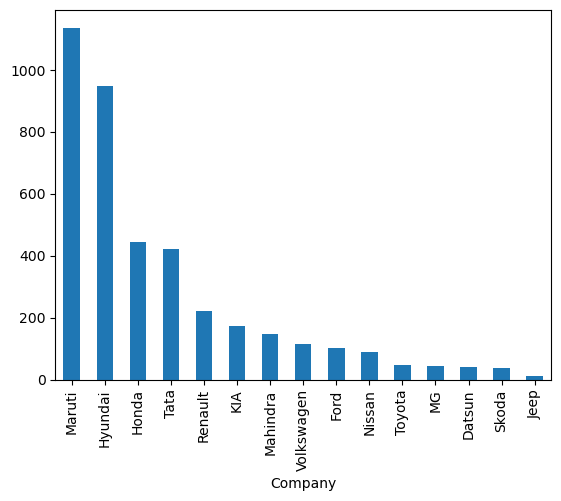

In [373]:
df['Company'].value_counts().plot(kind='bar')

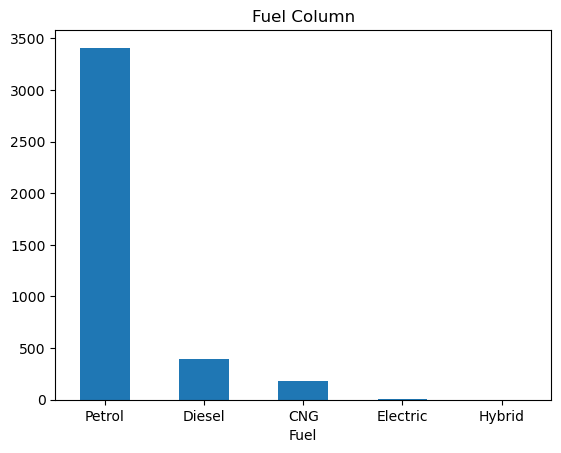

In [375]:
df['Fuel'].value_counts().plot(kind='bar')
plt.xticks(rotation = 0)
plt.title('Fuel Column')
plt.show()

Text(0.5, 1.0, 'Plot of Owners')

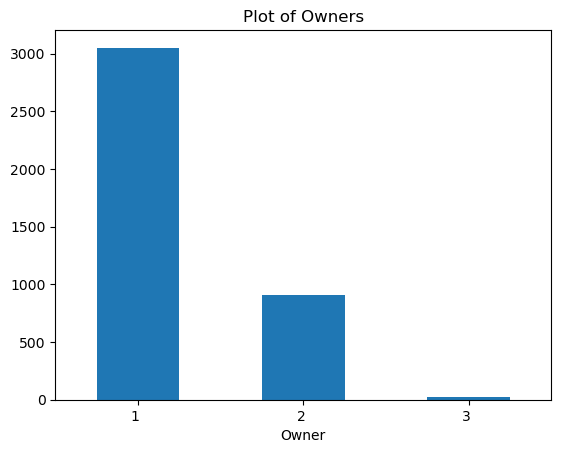

In [377]:
df['Owner'].value_counts().plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Plot of Owners")

In [381]:
df.describe()

,Price,km_driven
count,3983.000000,3983.000000
mean,6.160884,49204.555360
std,2.760417,25404.916487
min,1.600000,242.000000
25%,4.260000,29559.500000
50%,5.580000,46464.000000
75%,7.290000,68386.000000
max,20.970000,126094.000000


<Axes: xlabel='km_driven', ylabel='Price'>

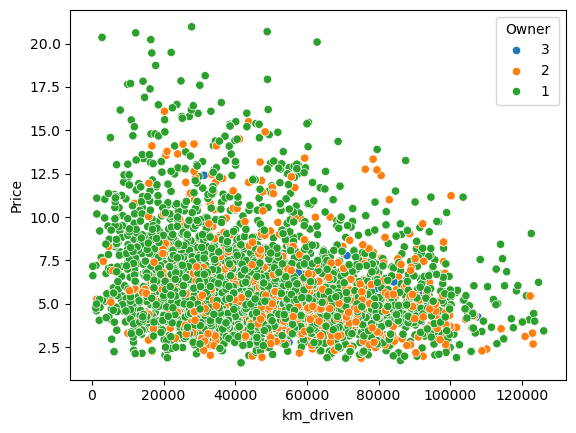

In [387]:
sns.scatterplot(data=df, x='km_driven', y='Price', hue='Owner')

<Axes: xlabel='Year'>

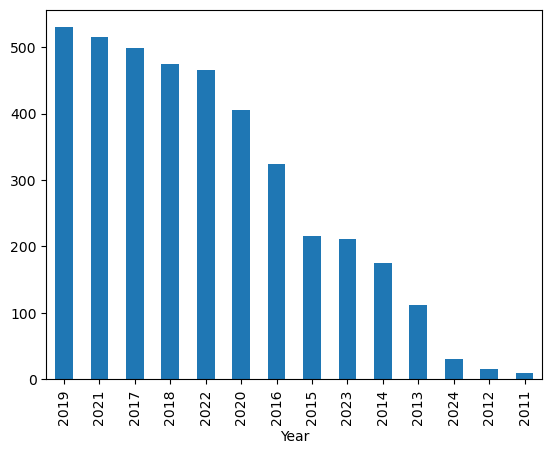

In [413]:
df['Year'].value_counts().plot(kind='bar')

<Axes: xlabel='Model'>

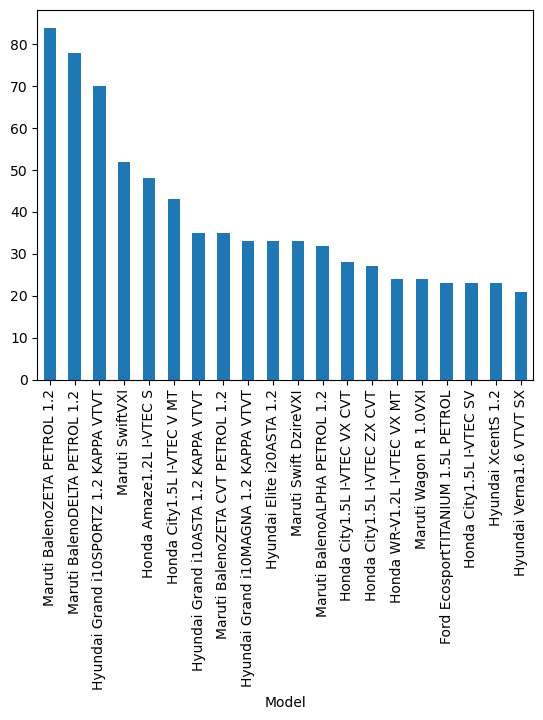

In [441]:
df['Model'].value_counts().head(20).plot(kind='bar')

<Axes: xlabel='Fuel', ylabel='Price'>

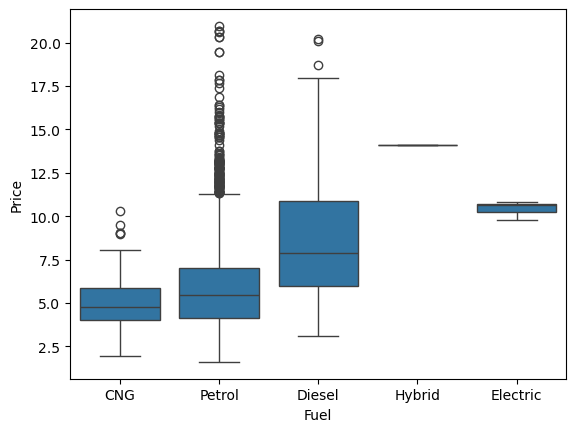

In [431]:
sns.boxplot(x='Fuel',y='Price',data=df)

In [521]:
clnd_copy = df.copy()

In [523]:
df.head()

,Title,Price,Model,km_driven,Fuel,Owner,Year,Company
0,2015 Hyundai Elite i20ASTA 1.2,4.25,Hyundai Elite i20ASTA,107697,CNG,3,2015,Hyundai
1,2022 Hyundai CretaSX 1.5 PETROL,12.00,Hyundai CretaSX 1.5,43737,Petrol,2,2022,Hyundai
2,2023 Nissan MAGNITEXV MT,6.43,Nissan MAGNITEXV MT,22904,Petrol,1,2023,Nissan
3,2018 Honda Jazz1.2L I-VTEC V,4.80,Honda Jazz1.2L I-VTEC,30871,Petrol,1,2018,Honda
4,2019 MG HECTORSHARP 2.0 DIESEL,10.87,MG HECTORSHARP 2.0,90189,Diesel,1,2019,MG


# Encoding

In [525]:
ohe = OneHotEncoder()

In [660]:
clm = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(sparse_output=False), ['Model', 'Company', 'Fuel'])
    ],
    remainder='passthrough'
)

In [662]:
transformed_data = clm.fit_transform(df)

In [664]:
transformed_columns = clm.get_feature_names_out()

In [666]:
transformed_columns

array(['onehot__Model_Datsun Go PlusT',
       'onehot__Model_Datsun Go PlusT(O)',
       'onehot__Model_Datsun GoREMIX EDITION', 'onehot__Model_Datsun GoT',
       'onehot__Model_Datsun Redi GoA',
       'onehot__Model_Datsun Redi GoGOLD',
       'onehot__Model_Datsun Redi GoS', 'onehot__Model_Datsun Redi GoT',
       'onehot__Model_Datsun Redi GoT(O)',
       'onehot__Model_Ford EcosportAMBIENTE 1.5L',
       'onehot__Model_Ford EcosportTITANIUM +',
       'onehot__Model_Ford EcosportTITANIUM 1.5',
       'onehot__Model_Ford EcosportTITANIUM 1.5L',
       'onehot__Model_Ford EcosportTITANIUM+ 1.0L',
       'onehot__Model_Ford EcosportTITANIUM+ 1.5L',
       'onehot__Model_Ford EcosportTREND +',
       'onehot__Model_Ford EcosportTREND 1.5L',
       'onehot__Model_Ford EcosportTREND+ 1.5L',
       'onehot__Model_Ford FREESTYLEFLAIR EDITION',
       'onehot__Model_Ford FREESTYLETITANIUM 1.2',
       'onehot__Model_Ford FREESTYLETITANIUM 1.5',
       'onehot__Model_Ford FREESTYLETITANIU

In [668]:
enc_df = pd.DataFrame(transformed_array, columns=transformed_columns)

In [670]:
enc_df = enc_df.drop('remainder__Title', axis=1)

In [672]:
enc_df

,onehot__Model_Datsun Go PlusT,onehot__Model_Datsun Go PlusT(O),onehot__Model_Datsun GoREMIX EDITION,onehot__Model_Datsun GoT,onehot__Model_Datsun Redi GoA,onehot__Model_Datsun Redi GoGOLD,onehot__Model_Datsun Redi GoS,onehot__Model_Datsun Redi GoT,onehot__Model_Datsun Redi GoT(O),onehot__Model_Ford EcosportAMBIENTE 1.5L,...,onehot__Company_Volkswagen,onehot__Fuel_CNG,onehot__Fuel_Diesel,onehot__Fuel_Electric,onehot__Fuel_Hybrid,onehot__Fuel_Petrol,remainder__Price,remainder__km_driven,remainder__Owner,remainder__Year
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4.25,107697,3,2015
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,12.0,43737,2,2022
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,6.43,22904,1,2023
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.8,30871,1,2018
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,10.87,90189,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.05,28765,2,2018
3979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,5.75,10500,2,2021
3980,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,8.25,10774,1,2023
3981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,8.55,44831,2,2021


In [658]:
enc_df.to_csv('D:/enc_df_car.csv', index=False)

# Spliting

In [587]:
X = enc_df.drop('remainder__Price', axis=1)
y = enc_df['remainder__Price']

In [589]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

* Conerting column dtype 'object' to 'int'

In [674]:
enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Columns: 536 entries, onehot__Model_Datsun Go PlusT to remainder__Year
dtypes: object(536)
memory usage: 16.3+ MB


In [579]:
df.columns

Index(['Title', 'Price', 'Model', 'km_driven', 'Fuel', 'Owner', 'Year',
       'Company'],
      dtype='object')

In [581]:
enc_df.columns

Index(['onehot__Model_Datsun Go PlusT', 'onehot__Model_Datsun Go PlusT(O)',
       'onehot__Model_Datsun GoREMIX EDITION', 'onehot__Model_Datsun GoT',
       'onehot__Model_Datsun Redi GoA', 'onehot__Model_Datsun Redi GoGOLD',
       'onehot__Model_Datsun Redi GoS', 'onehot__Model_Datsun Redi GoT',
       'onehot__Model_Datsun Redi GoT(O)',
       'onehot__Model_Ford EcosportAMBIENTE 1.5L',
       ...
       'onehot__Company_Volkswagen', 'onehot__Fuel_CNG', 'onehot__Fuel_Diesel',
       'onehot__Fuel_Electric', 'onehot__Fuel_Hybrid', 'onehot__Fuel_Petrol',
       'remainder__Price', 'remainder__km_driven', 'remainder__Owner',
       'remainder__Year'],
      dtype='object', length=536)

In [676]:
for i in enc_df.columns:
    if i ==  'remainder__Price':
        pass
    else:
        enc_df[i] = enc_df[i].astype(int)

In [686]:
enc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3983 entries, 0 to 3982
Columns: 536 entries, onehot__Model_Datsun Go PlusT to remainder__Year
dtypes: float64(1), int32(535)
memory usage: 8.2 MB


In [684]:
enc_df['remainder__Price'] = enc_df['remainder__Price'].astype(float)

In [688]:
enc_df['remainder__Price']

0        4.25
1       12.00
2        6.43
3        4.80
4       10.87
        ...  
3978     4.05
3979     5.75
3980     8.25
3981     8.55
3982     4.95
Name: remainder__Price, Length: 3983, dtype: float64

In [690]:
enc_df.to_csv('D:/n_enc_df', index=False)

# Model Selection

In [598]:
models = {
    'xg' : XGBRegressor(),
    'rf' : RandomForestRegressor(random_state=42),
    'gb' : GradientBoostingRegressor(random_state=42)
}

In [604]:
results = []
for name, model in models.items():
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    r2 = r2_score(y_pred, y_test)
    mse = mean_squared_error(y_pred,y_test)

    results.append({
        'Name' : name,
        "R2" : r2,
        "MSE" : mse
    })

In [606]:
results

[{'Name': 'xg', 'R2': 0.8182858228683472, 'MSE': 1.180221884628737},
 {'Name': 'rf', 'R2': 0.8106987000030069, 'MSE': 1.2552797992471767},
 {'Name': 'gb', 'R2': 0.47878140566264327, 'MSE': 2.249804447217902}]

## Hyper Parameter Tuning

In [637]:
param_dist = {
    'n_estimators':[50,100,150],         
    'max_depth': [2,3,4,5],              
    'learning_rate': [0.01, 0.05, 0.1, 0.2],       
    'subsample': [0.7, 0.8, 0.9,1],          
    'gamma': [0,2,3,5,7,8,10],                   
    'reg_alpha': [0,1,2,3,4,5],        
    'reg_lambda': [0,1,2,3,4,5]                          
}

In [639]:
xg = XGBRegressor()

In [641]:
rsc = RandomizedSearchCV(estimator=xg, 
                         param_distributions=param_dist, 
                         n_iter= 100,
                         n_jobs=-1,
                         scoring='r2',
                         cv=5,
                        random_state= 42
                        )

In [643]:
rsc.fit(X_train,y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'gamma': [0, 2, 3, 5, 7, 8, 10],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [50, 100, 150],
                                        'reg_alpha': [0, 1, 2, 3, 4, 5],
                                        'reg_lambda': [0, 1, 2, 3, 4, 5],
                                        'subsample': [0.7, 0.8, 0.9, 1]},
                   random_state=42, scoring='r2')

In [645]:
rsc.best_score_

0.7967924237251282

In [635]:
rsc.best_params_

{'colsample_bytree': 0.9747603118288211,
 'gamma': 0.7353674046451897,
 'learning_rate': 0.28797628754844834,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 389,
 'reg_alpha': 0.4591357562382613,
 'reg_lambda': 0.980032575285477,
 'subsample': 0.7463090469964349}

In [ ]:
pm = {'colsample_bytree': 0.9747603118288211,
 'gamma': 0.7353674046451897,
 'learning_rate': 0.28797628754844834,
 'max_depth': 12,
 'min_child_weight': 1,
 'n_estimators': 389,
 'reg_alpha': 0.4591357562382613,
 'reg_lambda': 0.980032575285477,
 'subsample': 0.7463090469964349}

In [593]:
xg.fit(X_train,y_train)

y_pred = xg.predict(X_test)
r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_pred, y_test)

print (f""" 
R2 Score: {r2}
MSE : {mse}
""")

 
R2 Score: 0.8182858228683472
MSE : 1.180221884628737



### using GBR

In [610]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
}


gb = GradientBoostingRegressor()

grid_search = RandomizedSearchCV(estimator=gb, param_distributions=param_grid ,cv=5, n_iter=100, scoring='r2')

grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)


Best params: {'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1}


In [612]:
grid_search.best_score_

0.8601988831210591

## I ran multiple regresson Algorithum like Gradient Boosting, XG boosting and Random Forest with Hyper Parameter Tuning. I found best score in Gradient Boosting algorithum. 

### R2 Score - 0.874

In [735]:
gb = GradientBoostingRegressor(
    subsample=0.7,
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    criterion= 'friedman_mse',
    alpha=0.5
)

In [737]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.5, max_depth=7, n_estimators=300,
                          subsample=0.7)

In [739]:
yp = gb.predict(X_test)

r2 = r2_score(yp, y_test)
mse = mean_squared_error(yp, y_test)

In [743]:
print (f""" 
R2 Score: {r2}
MSE : {mse}
""")

 
R2 Score: 0.8524783092519059
MSE : 1.022595779219485

